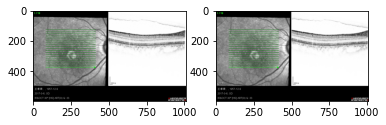

In [4]:
#TODO imageclass
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# img = Image.open("0.jpg").convert('L')
# img1 = Image.open("0.jpg").convert('L')
# img_array = np.asarray(img)
# img = Image.fromarray(img_array)
# img
# trans = transforms.ToTensor()

# img_array = plt.imread("0.jpg")
# fig = plt.figure()
# fig.suptitle("title")
# ax1 = fig.add_subplot(221)
# img = plt.imshow(img,cmap='hot')
# ax2 = fig.add_subplot(222)
# img = plt.imshow(img1,cmap='cool')
# plt.axis()
# plt.show()
# fig,(ax1,ax2) = plt.subplots(2,1)
# ax1.plot([1,2,10],[4,5,6])
# ax2.plot([1,2,0],[4,5,6])

img_array = plt.imread("0.jpg") # 直接以矩阵形式返回
# img = Image.open(path)
fig,ax = plt.figure() # 创建一个figure对象
ax1 = fig.add_subplot(121)
img = plt.imshow(img_array, cmap=None) # 输入一个矩阵或PILImage类，返回一个AxesImage对象
ax2 = fig.add_subplot(122)
img = plt.imshow(img_array, cmap=None) # 输入一个矩阵或PILImage类，返回一个AxesImage对象
# fig.suptitle("title")
plt.axis() # 显示坐标轴
plt.show() # 展示图片（jupyter不需要）


In [8]:
#TODO sitk
import os
import numpy as np
import SimpleITK as sitk
import cv2

print(os.listdir("F:\\MyGit\\Clone\\3DUNet-Pytorch\\fixed_data\\label")[0])


niifile1 = "D:\\BaiduCloud\\roi_204\\Pat_458\\roi_458_bingbian.nii"
niifile2 = "D:\\BaiduCloud\\roi_204\\Pat_458\\roi_458_nangbian.nii"
niifile3 = "D:\\BaiduCloud\\roi_204\\Pat_458\\roi_458_qianghua.nii"
img1_array = sitk.GetArrayFromImage(sitk.ReadImage(niifile1))
img2_array = sitk.GetArrayFromImage(sitk.ReadImage(niifile2))
img3_array = sitk.GetArrayFromImage(sitk.ReadImage(niifile3))
print(img1_array.shape)
print(img2_array.shape)
print(img3_array.shape)
res_array = img1_array+img2_array
# 合成测试
# res_array = img1_array + img2_array +img3_array+ img4_array
# res_array[res_array>1] = 1
res = sitk.GetImageFromArray(res_array)
sitk.WriteImage(res,"./out.nii")
# getsize()测试
# img = sitk.ReadImage(niifile1)
# print(img.GetSize())
# 开始结束slice
# img4_array.shape
# z = np.any(img4_array,axis=(1,2))
# z
# np.where(z)
# np.where(z)[0][[0,-1]]


segmentation-28.nii.gz
(144, 392, 353)
(144, 392, 353)
(144, 392, 353)


In [26]:
#TODO panda
import numpy as np
import pandas as pd
a = np.array([[1,2,3],[2,3,4]])
np.any(a,axis=(1))
df = pd.DataFrame(a,columns=['a','b','c'])
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
df_ = pd.DataFrame({"a":arr1,"b":arr2},columns=list("ab"))
df_

,a,b
0,1,4
1,2,5
2,3,6


In [13]:
# SummaryWriter
import pandas as pd
from collections import OrderedDict

item = OrderedDict({'epoch':1})
item.update(OrderedDict({"loss":0.1}))

tmp = pd.DataFrame(item,index=[0])
item


OrderedDict([('epoch', 1), ('loss', 0.1)])

[[1.0]]


[['001-V1-OCT.jpg', '001-V2-OCT.jpg', '001-V3-OCT.jpg'], ['002-V1-OCT.jpg', '002-V2-OCT.jpg', '002-V3-OCT.jpg'], ['004-V1-OCT.jpg', '004-V2-OCT.jpg', '004-V3-OCT.jpg'], ['006-V1-OCT.jpg', '006-V2-OCT.jpg', '006-V3-OCT.jpg'], ['012-V1-OCT.jpg', '012-V2-OCT.jpg', '012-V3-OCT.jpg'], ['013-V1-OCT.jpg', '013-V2-OCT.jpg', '013-V3-OCT.jpg'], ['014-V1-OCT.jpg', '014-V2-OCT.jpg', '014-V3-OCT.jpg'], ['019-V1-OCT.jpg', '019-V2-OCT.jpg', '019-V3-OCT.jpg'], ['024-V1-OCT.jpg', '024-V2-OCT.jpg', '024-V3-OCT.jpg'], ['029-V1-OCT.jpg', '029-V2-OCT.jpg', '029-V3-OCT.jpg'], ['034-V1-OCT.jpg', '034-V2-OCT.jpg', '034-V3-OCT.jpg'], ['035-V1-OCT.jpg', '035-V2-OCT.jpg', '035-V3-OCT.jpg'], ['037-V1-OCT.jpg', '037-V2-OCT.jpg', '037-V3-OCT.jpg'], ['038-V1-OCT.jpg', '038-V2-OCT.jpg', '038-V3-OCT.jpg'], ['040-V1-OCT.jpg', '040-V2-OCT.jpg', '040-V3-OCT.jpg'], ['043-V1-OCT.jpg', '043-V2-OCT.jpg', '043-V3-OCT.jpg'], ['046-V1-OCT.jpg', '046-V2-OCT.jpg', '046-V3-OCT.jpg'], ['047-V1-OCT.jpg', '047-V2-OCT.jpg', '047-V3-OC

In [29]:
# TODO test IMG.open
from PIL import Image
img = Image.open("1.jpg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x496 at 0x1310884DB50>


(84, 3)


In [17]:
import sys
sys.path.append("..")
# from config import config
# from torch.utils.data import DataLoader
import os
import time
import torch
import torchvision as tv
import torch.nn as nn
import numpy as np

class ExtractFeature(nn.Module):
    def __init__(self):
        super(ExtractFeature, self).__init__()
        self.resnet = tv.models.resnet50(pretrained=True)
        self.final_pool = nn.AdaptiveAvgPool2d(1)
        # self.final_pool = torch.nn.MaxPool2d(3, 2)

    def forward(self,x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        x = self.final_pool(x).squeeze()
        # x = x.flatten(start_dim=1)
        return x


class LSTM(nn.Module):
    def __init__(self, lstm_hidden_size=3000):
        super(LSTM, self).__init__()
        # features = 18432
        features = 2048
        layers = 2
        output = 3
        self.LSTM = nn.LSTM(features, lstm_hidden_size, layers, batch_first=True)
        self.Linear = nn.Linear(lstm_hidden_size, output)

    def forward(self, x):
        out, _ = self.LSTM(x)
        out_last = out[:, -1, :]
        out_last = self.Linear(out_last)
        return out_last

model1 = ExtractFeature().cuda()
model2 = LSTM().cuda()
print([{'params': model1.parameters()}, {'params': model2.parameters()}])

[{'params': <generator object Module.parameters at 0x0000020E72EB6F90>}, {'params': <generator object Module.parameters at 0x0000020E72EEBAC0>}]


In [11]:
#TODO Image.open
from PIL import Image
import os
import time
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np

class ExtractFeature(nn.Module):
    def __init__(self):
        super(ExtractFeature, self).__init__()
        self.resnet = tv.models.resnet50(pretrained=True)
        self.conv1 = nn.Conv2d(1,64,7,2,3,bias=False)
        self.final_pool = nn.AdaptiveAvgPool2d(1)
        # self.final_pool = torch.nn.MaxPool2d(3, 2)

    def forward(self,x):
        x = self.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        x = self.final_pool(x).squeeze()
        # x = x.flatten(start_dim=1)
        return x

img = "1.jpg"
transf = transforms.Compose([
    lambda x:Image.open(x),
    transforms.ToTensor(),
    transforms.Normalize(0.4630,0.2163)
]
    )
img_tensor = transf(img).unsqueeze(0)
# img_tensor = transf(img)
model = ExtractFeature()
img_out = model(img_tensor)
print(img_tensor.shape)
print(img_out.shape)


torch.Size([1, 1, 496, 512])
torch.Size([2048])


D:\BaiduCloud\roi_204\Pat_008\roi_008_qianghua.nii
D:\BaiduCloud\roi_204\Pat_015\roi_015_qianghua.nii
D:\BaiduCloud\roi_204\Pat_020\roi_020_qianghua.nii
D:\BaiduCloud\roi_204\Pat_021\roi_021_qianghua.nii
D:\BaiduCloud\roi_204\Pat_023\roi_023_qianghua.nii
['D:\\BaiduCloud\\roi_204\\Pat_008\\roi_008_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_015\\roi_015_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_020\\roi_020_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_021\\roi_021_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_023\\roi_023_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_024\\roi_024_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_026\\roi_026_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_029\\roi_029_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_030\\roi_030_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_031\\roi_031_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_035\\roi_035_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_053\\roi_053_qianghua.nii', 'D:\\BaiduCloud\\roi_204\\Pat_057\\roi_057_qiang

In [9]:
from torch import nn, optim

import sys
sys.path.append("..")
from torch.utils.data import DataLoader
import os
import time
import torch
import torchvision as tv
import torch.nn as nn
import numpy as np

class ExtractFeature(nn.Module):
    def __init__(self):
        super(ExtractFeature, self).__init__()
        self.resnet = tv.models.resnet50(pretrained=True)
        # self.conv1 = nn.Conv2d(config.input_channel,64,7,2,3,bias=False)
        self.final_pool = nn.AdaptiveAvgPool2d(1)
        # self.final_pool = torch.nn.MaxPool2d(3, 2)

    def forward(self,x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        x = self.final_pool(x).squeeze()
        # x = x.flatten(start_dim=1)
        return x


class LSTM(nn.Module):
    def __init__(self, lstm_hidden_size=2000):
        super(LSTM, self).__init__()
        # features = 18432
        features = 2048
        layers = 2
        output = 4
        self.LSTM = nn.LSTM(features, lstm_hidden_size, layers, batch_first=True)
        self.Linear = nn.Linear(lstm_hidden_size, output)

    def forward(self, x):
        out, _ = self.LSTM(x)
        out_last = out[:, -1, :]
        out_last = self.Linear(out_last)
        return out_last


model1 = ExtractFeature()
model2 = LSTM()
optimizer = optim.Adam([{'params': model1.parameters()},
                        {'params': model2.parameters()}], lr=1e-4,
                        amsgrad=True)
print(optimizer.params)

AttributeError: 'Adam' object has no attribute 'params'

In [1]:
import os
labels = r"F:\Dataset\CNV_Seg\png_split_622\mask\train\chen_L_time001_1.png"
img_num=len(os.listdir(os.path.dirname(labels)))
print(img_num)

6144


In [8]:
import SimpleITK as sitk
import numpy as np

imagearray = sitk.GetArrayFromImage(sitk.ReadImage(r"C:\Users\TRT\Desktop\1.nii.gz"))
singlearray = imagearray[16]
print(singlearray.shape)
print(np.sum(singlearray==2))

(1024, 512)
30705


In [10]:
import cv2
img = cv2.imread("./testset/1.jpg")
print(img)

[[[ 0  0  0]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 3  3  3]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 6  6  6]
  [10 10 10]
  ...
  [ 3  3  3]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 0  0  0]
  [10 10 10]
  [15 15 15]
  ...
  [ 3  3  3]
  [ 2  2  2]
  [ 1  1  1]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
